In [73]:
import numpy as np
from imports.utils import *
init_notebook_mode(connected=True)
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt

In [85]:
# 파라미터 설정
N_PULSE_32 = 32
N_PULSE_64 = 64
N_PULSE_96 = 96
N_PULSE_256 = 256
MAGNETIC_FIELD = 403.553            # Unit: Gauss
GYRO_MAGNETIC_RATIO = 1.07*1000               # Unit: Herts
WL_VALUE = MAGNETIC_FIELD*GYRO_MAGNETIC_RATIO*2*np.pi

# 시간 범위 설정
time_data = np.arange(0, 60, 0.004)

In [86]:
total_indices = np.load('../data/total_indices/total_indices_v4_N32.npy', allow_pickle=True).item()
AB_lists_dic = np.load('../data/AB_target_dic/AB_target_dic_v4_s0.npy', allow_pickle=True).item()
for i in range(1, 16):
    temp = np.load('../data/AB_target_dic/AB_target_dic_v4_s{}.npy'.format(i), allow_pickle=True).item()
    AB_lists_dic.update(temp)

In [87]:
# 스핀 파라미터 정의
total_spins = np.array([
                        [5, 32],
                        [41, 53],
                        [10, 11],
                        [-17, 18],
                        [-23, 15],
                        [-35, 28],
])

In [88]:
# CPMG 신호 생성
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_32)
Px = (1+M_values) / 2

Text(0, 0.5, 'Px')

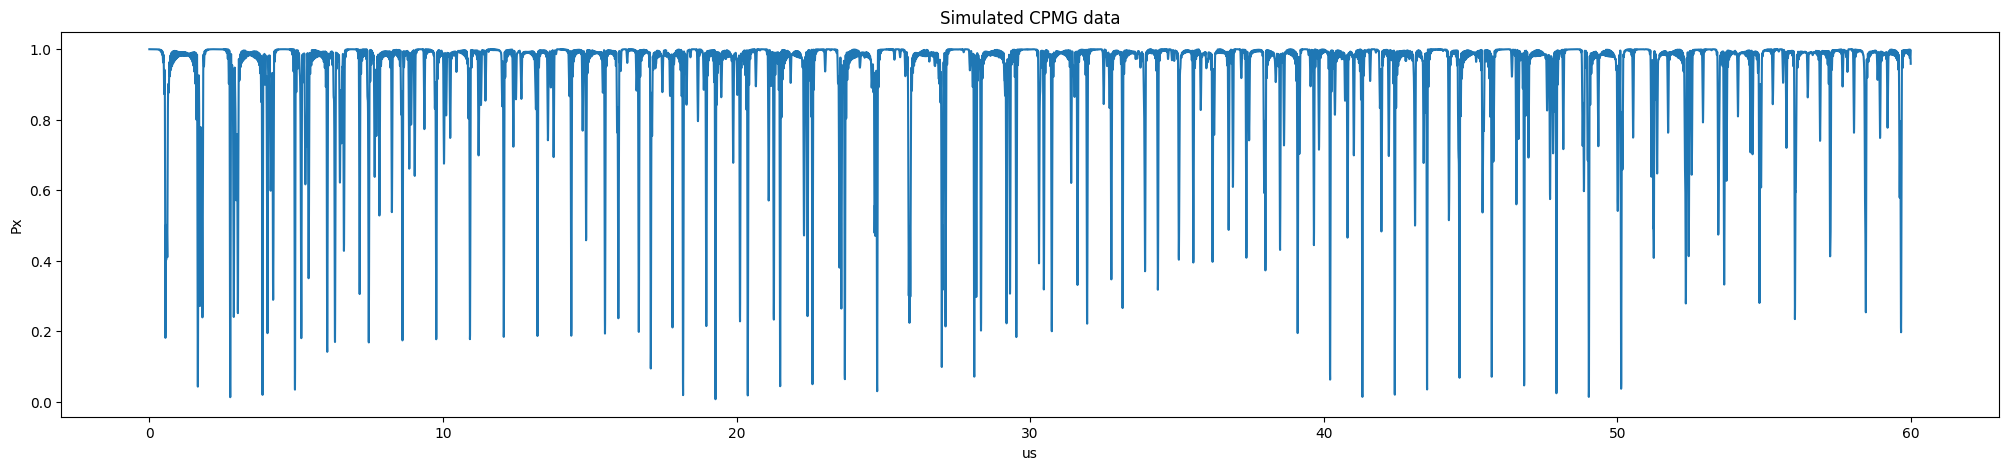

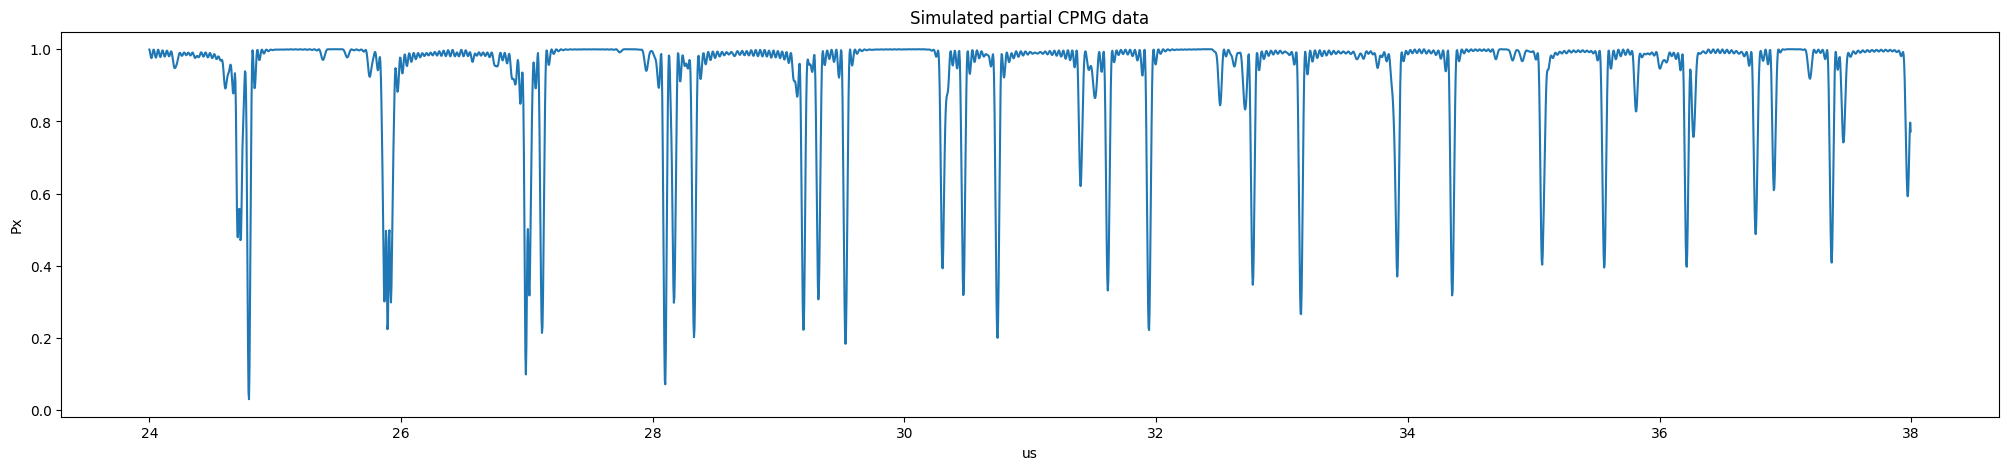

In [89]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

In [90]:
A_index = 0
image_width = 120
model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)

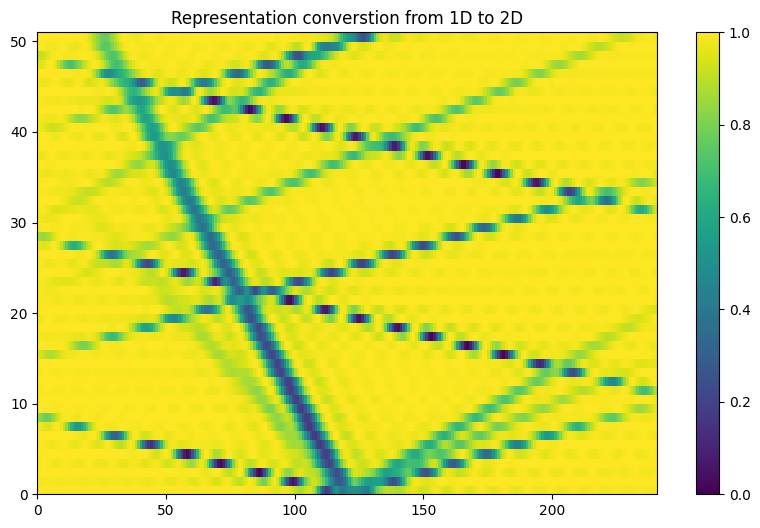

In [91]:
plt.figure(facecolor='w', figsize=(10,6))
plt.pcolor(Px[model_index], vmin=0, vmax=1)
plt.title('Representation converstion from 1D to 2D')
plt.colorbar()

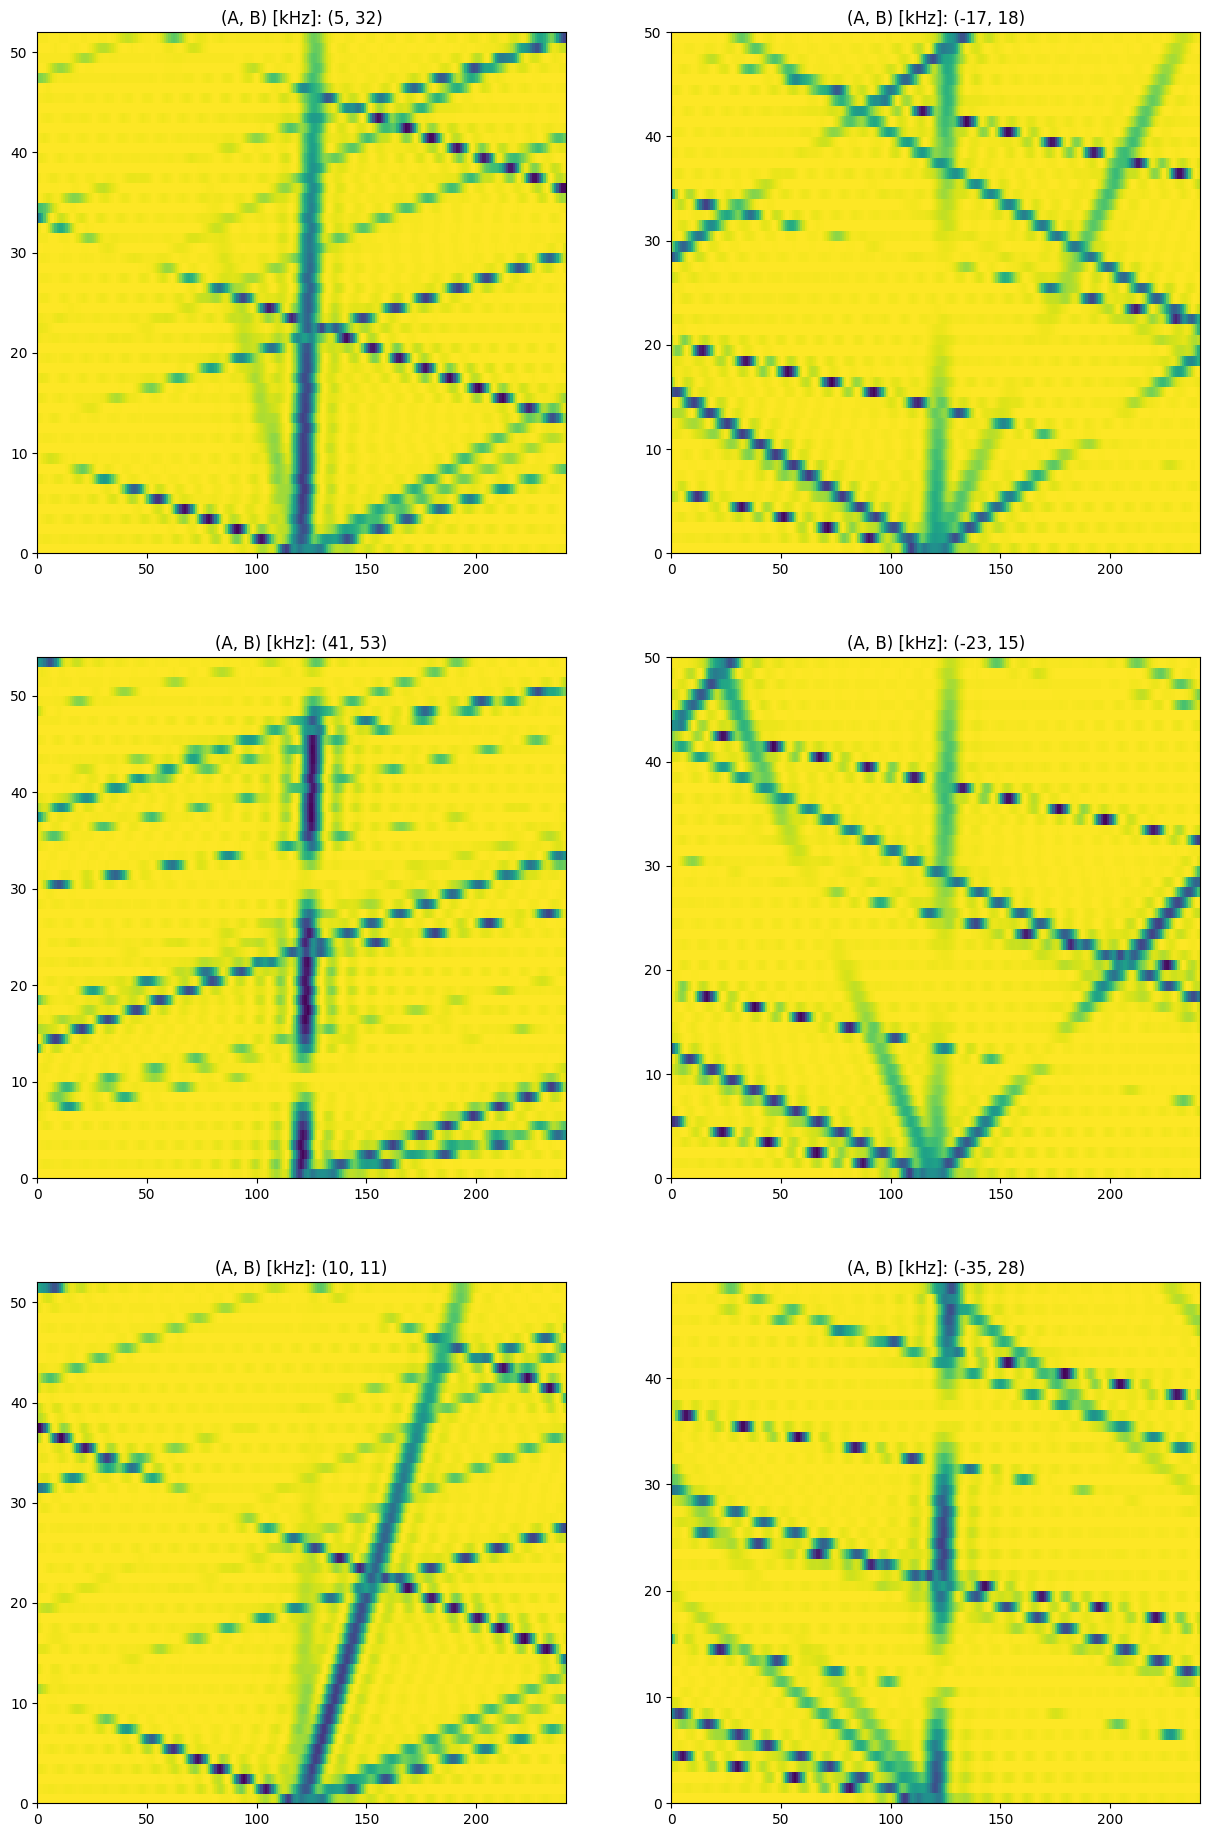

In [92]:
# 다른 A_index 값
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')